In [2]:
import pandas as pd
import tensorflow as tf
from colorthief import ColorThief
import os
import matplotlib.pyplot as plt
from matplotlib import gridspec

In [3]:
image_path = "posters/movie1.png"
color_thief = ColorThief(image_path)

count = 10
dominant_color = color_thief.get_color(quality=1)
palette = color_thief.get_palette(color_count=count)
palette

[(233, 206, 123),
 (33, 28, 22),
 (46, 129, 203),
 (104, 191, 211),
 (84, 107, 120),
 (111, 158, 180),
 (178, 69, 37),
 (20, 82, 156),
 (10, 50, 101)]

In [4]:
palette2 = []
dc = tuple(ti/255 for ti in dominant_color)

for i in palette:
    c = tuple(ti/ 255 for ti in i)
    palette2.append(c)

print(dc)
palette2.sort()
palette2

(0.20392156862745098, 0.5058823529411764, 0.7725490196078432)


[(0.0392156862745098, 0.19607843137254902, 0.396078431372549),
 (0.0784313725490196, 0.3215686274509804, 0.611764705882353),
 (0.12941176470588237, 0.10980392156862745, 0.08627450980392157),
 (0.1803921568627451, 0.5058823529411764, 0.796078431372549),
 (0.32941176470588235, 0.4196078431372549, 0.47058823529411764),
 (0.40784313725490196, 0.7490196078431373, 0.8274509803921568),
 (0.43529411764705883, 0.6196078431372549, 0.7058823529411765),
 (0.6980392156862745, 0.27058823529411763, 0.1450980392156863),
 (0.9137254901960784, 0.807843137254902, 0.4823529411764706)]

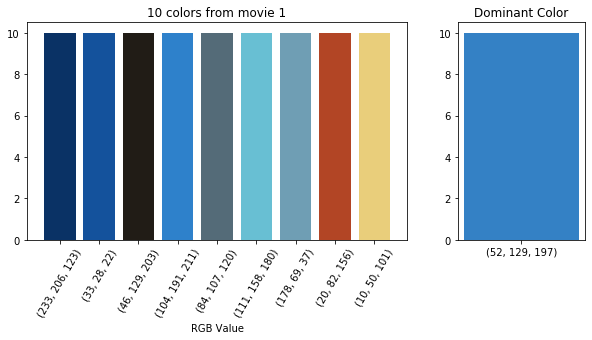

In [5]:
x = []
y=[]
for i in range(0,len(palette2)):
    x.append(str(palette[i]))
    y.append(10)

fig = plt.subplots(figsize = (10,4))
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1]) 

plt.subplot(gs[0])
plt.bar(x,y,color=palette2)
plt.xlabel('RGB Value')
plt.xticks(rotation=60)
plt.title('10 colors from movie 1')
plt.subplot(gs[1])
plt.bar(str(dominant_color),10,color=dc)
plt.title('Dominant Color')
plt.show()

In [6]:
import cv2
import sys

imagePath = image_path

image = cv2.imread(imagePath)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor=1.3,
    minNeighbors=3,
    minSize=(30, 30)
)

print("[INFO] Found {0} Faces.".format(len(faces)))

for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    roi_color = image[y:y + h, x:x + w]
    print("[INFO] Object found. Saving locally.")
    cv2.imwrite(str(w) + str(h) + '_faces.jpg', roi_color)

status = cv2.imwrite('faces_detected.jpg', image)
print("[INFO] Image faces_detected.jpg written to filesystem: ", status)

[INFO] Found 0 Faces.
[INFO] Image faces_detected.jpg written to filesystem:  True
